In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [2]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [320]:
train_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [321]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [322]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

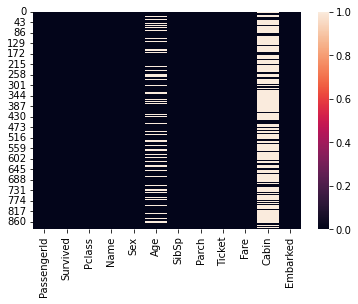

In [323]:
#two ways to find missing data
#first - visualization
sns.heatmap(train_data.isnull())

In [324]:
#second - table
total = train_data.isnull().sum().sort_values(ascending=False)
percent = train_data.isnull().sum()/train_data.isnull().count() * 100
percent_2 = (round(percent, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys = ['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000


/Users/anastasiamartynova/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

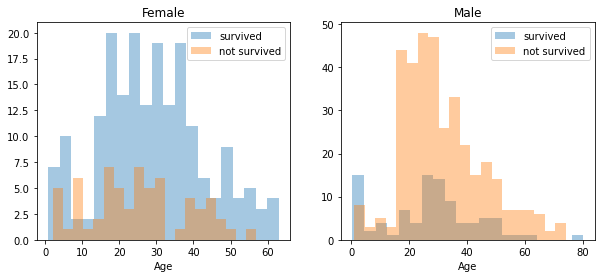

In [325]:
#try to understant how chance to survive depends on sex and age
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax1 = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde =False)
ax1 = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1], kde =False)
ax1.legend()
ax1.set_title('Male')

/Users/anastasiamartynova/opt/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/anastasiamartynova/opt/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


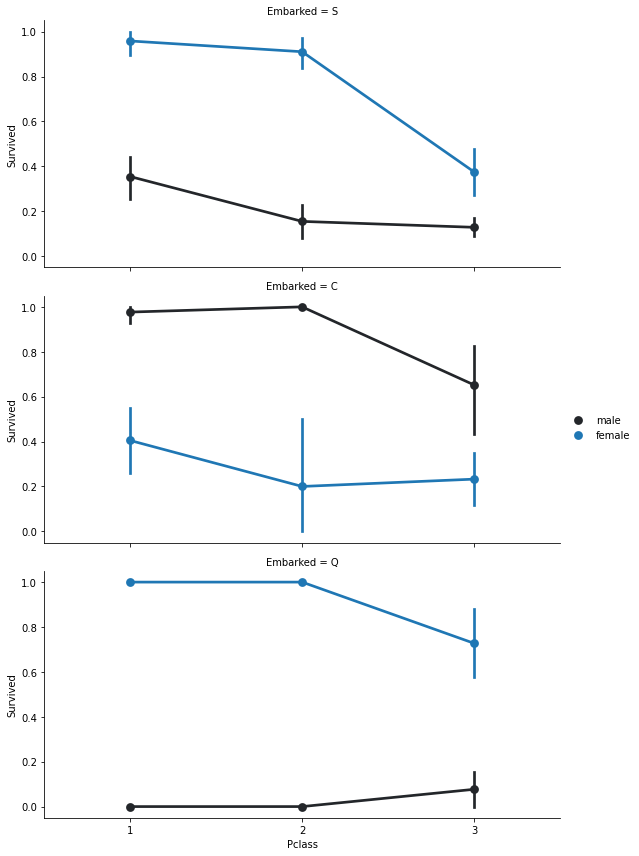

In [326]:
FG = sns.FacetGrid(train_data, row='Embarked', height=4, aspect=2)
FG.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
FG.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

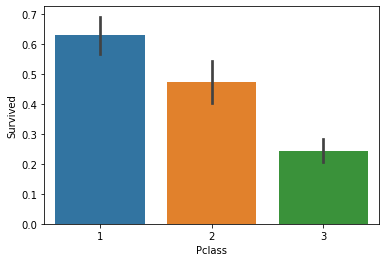

In [327]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

In [328]:
data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/Users/anastasiamartynova/opt/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


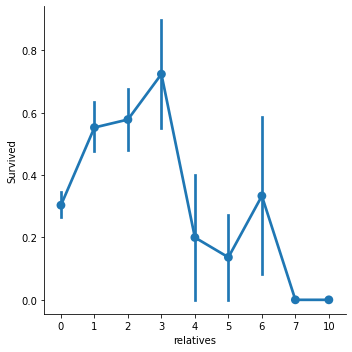

In [329]:
axes = sns.factorplot(x = 'relatives', y = 'Survived', data = train_data)

In [330]:
#now we can prepare our data
train_data = train_data.drop(['PassengerId'], axis=1)
train_data = train_data.drop(['Cabin'], axis=1)

In [331]:
test_data = test_data.drop(['Cabin'], axis=1)

In [332]:
mean = train_data['Age'].mean()
years = round(train_data['Age'].fillna(mean), 0)
train_data = train_data.drop('Age', axis=1)

In [333]:
train_data = pd.concat([train_data, years], axis=1)

In [334]:
mean = test_data['Age'].mean()
years = round(test_data['Age'].fillna(mean), 0)
test_data = test_data.drop('Age', axis=1)
test_data = pd.concat([test_data, years], axis=1)

In [335]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [336]:
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [337]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Ticket     891 non-null    object 
 7   Fare       891 non-null    float64
 8   Embarked   891 non-null    object 
 9   relatives  891 non-null    int64  
 10  not_alone  891 non-null    int64  
 11  Age        891 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [338]:
data = [train_data, test_data]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [339]:
test_data

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Age
0,892,3,"Kelly, Mr. James",male,0,0,330911,7,Q,0,1,34.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7,S,1,0,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9,Q,0,1,62.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8,S,0,1,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12,S,2,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8,S,0,1,30.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108,C,0,1,39.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7,S,0,1,38.0
416,1308,3,"Ware, Mr. Frederick",male,0,0,359309,8,S,0,1,30.0


In [340]:
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [341]:
genders = {'male':0, 'female':1}
data = [train_data, test_data]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [342]:
train_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [343]:
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [344]:
ports = {'S':0, 'Q':1, 'C':2}
data = [train_data, test_data]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [348]:
X_train = train_data.drop('Survived', axis=1)
Y_train = train_data['Survived']
X_test = test_data.drop('PassengerId', axis=1).copy()

In [349]:
lreg = LogisticRegression()
lreg.fit(X_train, Y_train)
Y_pred = lreg.predict(X_test)

/Users/anastasiamartynova/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [354]:
acc_log = round(lreg.score(X_train, Y_train) * 100, 2)

In [353]:
acc_log

80.47

In [356]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_pred})
output.to_csv('submission.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
